# TMA4320 - Øving 5, Iterative metoder

Dette er en liten øving som du burde kunne gjøre før du starter opp med Prosjekt 2.
Den bli veiledet i øvingstimen fredag 22.2, kl 9-10. Innleveringsfrist er fredag 1. mars.


**Oppgave 1** Vi skal løse et spesifikt ligningssystem
$$
     A \mathbf{u} = b,\quad A\in\mathbb{R}^{n\times n},\quad b\in\mathbb{R}^n
$$

med hensyn på $\mathbf{u}$ ved å bruke SOR-metoden. La $h=\frac{1}{n+1}$ og la $b_i=h^2f(x_i)$
der $f(x)$ er en funksjon definert på intervallet $x\in[0,1]$. Vi tenker oss at systemet stammer fra Poisson-problemet $-u''(x)=f(x)$ der den dobbelderiverte er erstattet med en differenseformel, og en bruker randverdier $u(0)=u(1)=0$.
Vi har da at

$$
A = \left[
\begin{array}{rrrrrrr}
2 & -1 & 0 &  \cdots & 0  \\
-1&  2 & -1    &   \ddots      & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots &\ddots & \ddots &\ddots & -1 \\
0 &\cdots & 0 & -1 & 2
\end{array} 
\right]
$$

Du kan bruke følgende verdier til å teste ut:

* $n=10$
* $f(x)=x$ som impliserer at den eksakte løsningen er $u(x) = \frac{1}{6}\,x\,(1-x^2)$ eller
$\mathbf{u}_i\,=\,ih\,(1-(ih)^2),\ i=1,\ldots,n$
* $\mathtt{tol}=$1e-5
* $\omega=1.2$
* $\mathtt{maxiter}=1000$
* $u_0=[0,\ldots,0]^T$ (numpy.zeros(n))

Bruk algoritmen beskrevet i boka på side 110 og bruk gjerne en funksjonsheader som nedenfor.
Bruk det enkle feilestimatet $\mathtt{est}=\|u^{(k+1)}-u^{(k)}\|$ (numpy.linalg.norm()).

**NB!** Du kan skrive funksjonen som *dedikert* til matrisen $A$, dvs funksjonen hardkoder at $A$ er gitt som ovenfor og behøver ikke å kunne brukes for en vilkårlig $A$.

**Kontrollspørsmål 1** Hvor mange iterasjoner trengs for å oppnå det spesifiserte stoppkriteriet ovenfor.
Denne gangen angir du ditt resultat (ikke flervalg).

**Oppgave 2** For tilfellet $n=30$, $f(x)=-\sin x\ln x$, $\mathtt{tol}=$1e-5, $u_0=[0,\ldots,0]^T$, prøv deg fram for å finne hvilken $\omega$ som gjør at iterasjonen konvergerer raskest.

**Kontrollspørsmål 2:** Angi din optimale $\omega$ med 2 gjeldende siffer (dvs f.eks. 1.3). Du kan nøye deg med å søke etter $\omega$-verdier i intervallet $[1,2]$. Her angir du også verdi (ikke flervalg).


**Godkjenningskrav**
En Jupyter notebook fil med funksjon som implementerer SOR-metoden som spesifisert skal lastes opp i Bb og det skal svares på kontrollspørsmål.



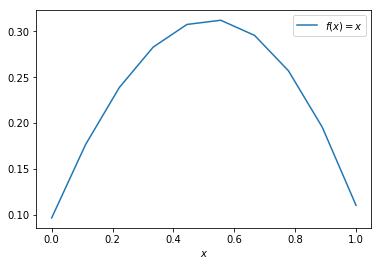

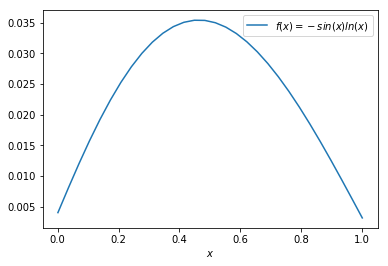

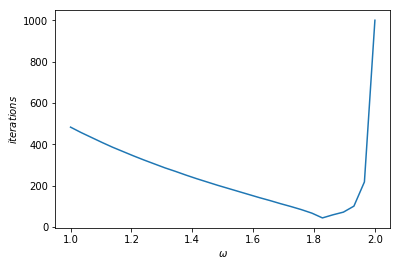

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def Poisson(omega,f,u0,tol,maxiter):
    '''
    Compute the solution to Poisson's equation in 1D by means of the SOR method. 
    Return the computed solution u.
    omega: Value of the relaxation parameter in SOR
    f: The right hand side of the Poisson equation as in -u''(x) = f(x)
    u0: The initial value for the iteration
    tol: The tolerance to be used in the stopping criterion (est < tol)
    maxiter: The maximum number of iterations
    
    '''
    u = u0.copy()
    n = len(u)
    h = 1/(n+1)
    u_new = u0.copy()
    iter = 0
    est = 2*tol
    x = np.linspace(1e-3,1,n)
    while est > tol and iter < maxiter:
        u_new[0] = (1-omega)*u[0] + (omega/2)*(h*h*f(x[0]) + u[1])
        
        for i in range(1,n-1):
            u_new[i] = (1-omega)*u[i] + (omega/2)*(h*h*f(x[i]) + u[i+1] + u_new[i-1])
        u_new[n-1] = (1-omega)*u[n-1] + (omega/2)*(h*h*f(x[n-1]) + u_new[n-2])
        
        est = np.linalg.norm(u_new-u)
        u = u_new.copy()
        iter += 1
    return u_new, iter

def f(x):
    return 2+x

n = 10
tol = 1e-5
omega = 1.1
maxiter = 1000
u0 = np.zeros(n)

u,i = Poisson(omega,f,u0,tol,maxiter)
x = np.linspace(0,1,n)
plt.plot(x,u, label=r'$f(x)=x$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()


def g(x):
    return -np.sin(x)*np.log(x)

n = 30
omega = 1.8
u0 = np.zeros(n)
x = np.linspace(1e-3,1,n)
u, i = Poisson(omega,g,u0,tol,maxiter)
plt.plot(x,u,label=r'$f(x)=-sin(x)ln(x)$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()


omegas = np.linspace(1,2,n)
iterations = np.zeros(n)
for i in range(n):
    u,iterations[i] = Poisson(omegas[i],g,u0,tol,maxiter)
    
plt.plot(omegas,iterations)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$iterations$')
plt.show()   #Kan tyde på at det er raskest konvergens når omega=1.8